In [16]:
import pandas as pd 
import json
import requests

In [17]:
df =pd.read_parquet("./final_data.parquet")

In [18]:
df.columns = df.columns.str.replace('-', '_')

In [19]:
df["date"] = df["date"].astype(str)

In [20]:
df.drop(columns=["hasfailed","cumulative_hasfailed"], inplace=True)


In [21]:
json_data =json.loads(df.to_json(orient="records"))

In [22]:
response = requests.post("http://52.72.1.74:8000/add_data", json={"data":json_data})
print(response.status_code)
print(response.json())

200
{'message': 'Data added successfully'}


<AxesSubplot:title={'center':'Number of failures per month'}, xlabel='Month', ylabel='Number of failures'>

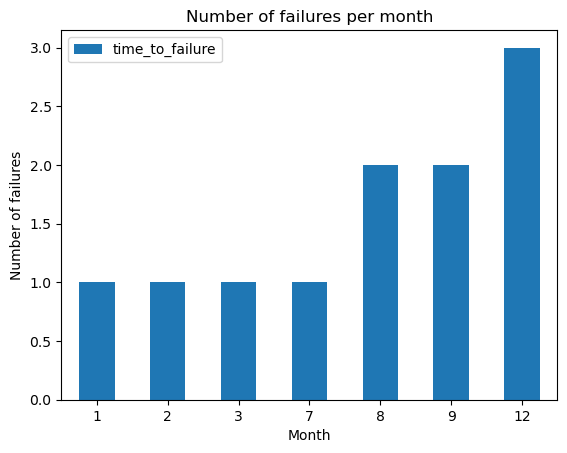

In [23]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df= df[df["time_to_failure"]==0]
df[["month","time_to_failure"]].groupby("month").count().plot(title="Number of failures per month", kind="bar",xlabel="Month", ylabel="Number of failures",rot=0)